# Comparaciones, Máscaras, y Lógica Booleana

Esta sección cubre el uso de máscaras Booleanas para examinar y manipular valores con arreglos de NumPy

Masking o máscaras se utiliza cuando se quiere extraer, modificar, contar, o manipular valores en un arreglo, por ejemplo:
- Contar todos los valores mayores a cierto valor.
- Quitar todos los valores por encima de algún parámetro.

Para estos ejemplos utilizaremos NumPy, Mabplotlib, Seaborn, y Pandas.

In [1]:
import numpy as np
import pandas as pd

# Importar datos como un NumPy Array
datos =  pd.read_csv('hipparcos-voidmain.csv')
datos.shape

(118218, 78)

In [2]:
datos.columns

Index(['Catalog', 'HIP', 'Proxy', 'RAhms', 'DEdms', 'Vmag', 'VarFlag',
       'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA', 'pmDE',
       'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA',
       'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE',
       'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag', 'e_BTmag', 'VTmag',
       'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I', 'e_V-I', 'r_V-I',
       'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax',
       'HPmin', 'Period', 'HvarType', 'moreVar', 'morePhoto', 'CCDM', 'n_CCDM',
       'Nsys', 'Ncomp', 'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho',
       'e_rho', 'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
       'CPD', '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')

In [3]:
datos.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 4.0000e+00,
        4.0000e+00, 6.0000e+00, 8.0000e+00, 2.5000e+01, 3.4000e+01,
        5.0000e+01, 7.7000e+01, 1.1300e+02, 1.8900e+02, 2.8100e+02,
        4.2000e+02, 7.2900e+02, 1.0450e+03, 1.6980e+03, 2.4300e+03,
        4.0590e+03, 5.9000e+03, 8.1640e+03, 1.1502e+04, 1.4757e+04,
        1.6277e+04, 1.6831e+04, 1.2498e+04, 8.0760e+03, 5.0670e+03,
        3.0320e+03, 2.0540e+03, 1.1660e+03, 7.8600e+02, 5.4700e+02,
        2.6600e+02, 7.9000e+01, 2.2000e+01, 1.3000e+01, 2.0000e+00]),
 array([-1.44 , -1.052, -0.664, -0.276,  0.112,  0.5  ,  0.888,  1.276,
         1.664,  2.052,  2.44 ,  2.828,  3.216,  3.604,  3.992,  4.38 ,
         4.768,  5.156,  5.544,  5.932,  6.32 ,  6.708,  7.096,  7.484,
         7.872,  8.26 ,  8.648,  9.036,  9.424,  9.812, 10.2  , 10.588,
        10.976, 11.364, 11.752, 12.14 , 12.528, 12.916, 13.304, 13.692,
        14.08 ]),
 <BarContainer object of 40 artists>)

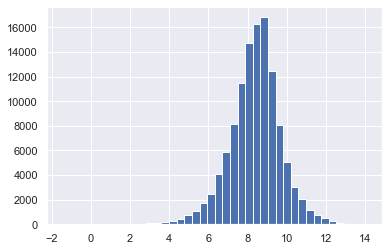

In [5]:
# Creamos un histograma para darnos una idea de cómo se ven nuestros datos de Vmag
plt.hist(datos['Vmag'], 40)

In [6]:
# Podemos ver que la mayor parte de las magnitudes se encuentran entre 6 y 10
# Si quisieramos operar sobre los datos, una aproximación es realizar un loop sobre los datos, pero esto es ineficiente.
# Podemos utilizar funciones de NumPy para realizar operaciones a nivel de bit, las cuales son más eficientes
# También podemos utilizar "masking" para filtrar nuestros datos

## Operadores comparativos como Funciones Universales (ufuncs)
- Podemos utilizar los operadores `+`, `-`, `*`, `/`, así como también `<`, `>`, como operadores a nivel de elemento.
- El resultado de este tipo de operadores es siempre un arreglo con un tipo Booleano. Ejemplos:

In [7]:
x = np.array([1, 2, 3, 4, 5])

In [8]:
x
# evaluemos si x<3 y x>3

array([1, 2, 3, 4, 5])

In [9]:
x < 3

array([ True,  True, False, False, False])

In [10]:
x > 3

array([False, False, False,  True,  True])

In [11]:
x <= 3

array([ True,  True,  True, False, False])

In [12]:
x >= 3

array([False, False,  True,  True,  True])

In [13]:
x != 3

array([ True,  True, False,  True,  True])

In [14]:
x == 3

array([False, False,  True, False, False])

In [15]:
x

array([1, 2, 3, 4, 5])

In [16]:
# También podemos realizar comparación de dos arreglos para incluir expresiones compuestas
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

- Cuando hablamos de Funciones Universales nos referimos a los siguientes equivalentes en NumPy:
    - `==` `np.equal`
    - `<` `np.less`
    - `>` `np.greater`
    - `!=` `np.not_equal`
    - `<=` `np.less_equal`
    - `>=` `np.greater_equal`
- Estas funciones se pueden utilizar en arreglos de cualquier tamaño y forma. Veamos un ejemplo en un arreglo de dos dimensiones.

In [17]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [18]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [19]:
x > 6 

array([[False, False, False, False],
       [ True,  True, False, False],
       [False, False,  True, False]])

In [20]:
# x mayor a 6 y menor que nueve
(x > 6) & (x < 9)

array([[False, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False]])

In [21]:
# x mayor a 6 o menor que nueve
(x > 6) & (x < 9)

array([[False, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False]])

## Operaciones con arreglos
- Realicemos operaciones utilizando nuestro arreglo X creado previamente

In [22]:
# Contar cuántos valores que son diferentes de 0
np.count_nonzero(x)

11

In [23]:
# Contar cuántos valores son menor a 6 y son diferentes de 0
np.count_nonzero(x < 6)

8

In [24]:
# También podemos utilizar sum. Que suma los verdaderos y falsos de la condición
np.sum(x < 6)

8

In [25]:
# ¿Qué valor va a devolver el siguiente código?
np.sum(x)

54

In [26]:
# Sum() también se puede ejecutar en filas o columnas. Ejemplo
# Retorna los valores menores a 6 en cada columna
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [27]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

También podemos averiguar si todos los valores corresponden a una condición con `np.all()`

In [28]:
np.all(x < 10)

True

Podemos buscar si una condición se cumple para por lo menos uno de los valores utilizando `np.any()`

In [29]:
np.any(x > 8)

True

In [30]:
# Existe algún valor menor a 0
np.any(x < 0)

False

`np.all()` y `np.any()` también se pueden utilizar en solo filas y columnas

In [31]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [32]:
# ¿Son todos los valores de las filas menor a 8?
np.all(x < 8, axis = 1)

array([ True, False,  True])

In [33]:
# ¿Existe algún valor menor a 8 en todas las columnas?
np.any(x < 8, axis = 1)

array([ True,  True,  True])

## Operadores boleanos
- Podemos utilizar los operadores booleanos para combinar diferentes condiciones.
- Los operadores bitwise lógicos son `&`, `|`, `^`, `~`
- Normalmente se utilizan en conjunto con paréntesis para darle el orden de las operaciones deseado.

In [34]:
# Operador & "AND"
# La suma de los números mayores a 3 y menores a 5
np.sum((x > 3) & (x < 5))

1

# Indexado (fancy indexing)

En las secciones anteriores vimos como acceder a partes del array utilizando índices simples. En esta sección veremos un tipo de indexado conocido como "fancy indexing".

Este tipo de indexado permite acceder a diferentes arreglos de elementos de una sola vez. Veamos un ejemplo

In [35]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Si quisieramos acceder a los índices de los elementos podríamos hacerlo de la siguiente manera

In [36]:
[x[2], x[4], x[6]]

[14, 60, 82]

In [37]:
# Alternativamente se puede acceder con una lista de indices para luego pasarla directamente al arreglo
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Cuando utilizamos fancy indexing, el resultado representa la forma de los 'índices del arreglo', en lugar de 'el arreglo indexado'. Es decir, el resultado es un tipo de dato array/arreglo. Veamos otro ejemplo

In [38]:
ind = np.array([[3, 7], [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

El fancy indexing también funciona en arreglos de múltiples dimensiones, considere el siguiente arreglo

In [39]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [40]:
x = x.reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Como en un indexado estándar, el primer índice se refiere a la fila, y el segundo a la columna. Tendremos un par de índices, el cual corresponderá a un número dentro del arreglo

In [41]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]

array([ 2,  5, 11])

## Indexemos datos de ejemplo

Las reglas de indexado siguen el broadcasting que vimos en el notebook de arreglos y broadcasting. Por ejemplo, si combinamos un vector columna con un vector fila obtenemos un resultado de dos dimensiones.

In [49]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [51]:
col

array([2, 1, 3])

In [52]:
# el resultado de esta operación es la combinación de cada fila del 0 al 2, con cada columna en indice 2,1, 3
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Esta regla de broadcasting e indexado se entiende a operaciones aritméticas, por ejemplo

In [53]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])